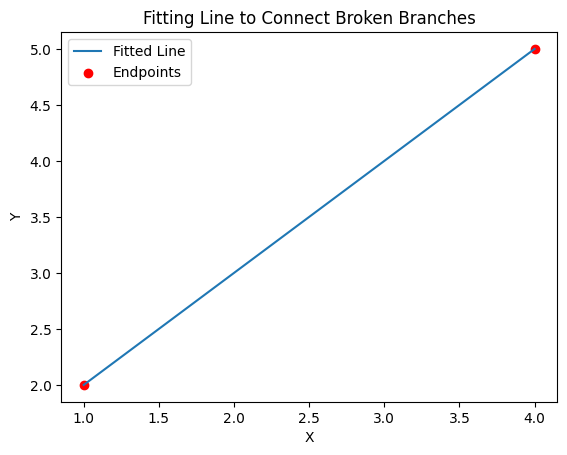

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 断裂点坐标
P1 = (1, 2)
P2 = (4, 5)

# 计算斜率和截距
m = (P2[1] - P1[1]) / (P2[0] - P1[0])
c = P1[1] - m * P1[0]

# 生成 x 值和对应的 y 值
x_values = np.linspace(P1[0], P2[0], 100)
y_values = m * x_values + c

# 绘制结果
plt.plot(x_values, y_values, label='Fitted Line')
plt.scatter(*zip(P1, P2), color='red', label='Endpoints')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting Line to Connect Broken Branches')
plt.show()

In [2]:
from PIL import Image
import numpy as np

# 加载掩码图片
image_path = '/home/pxl/myProject/血管分割/test.png'
image = Image.open(image_path)

# 转换为灰度图（如果不是灰度图）
gray_image = image.convert('L')

# 转换为numpy数组（矩阵）
image_matrix = np.array(gray_image)

# 打印矩阵
print(image_matrix)

# 保存矩阵到文件
np.savetxt('mask_matrix.txt', image_matrix, fmt='%d')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


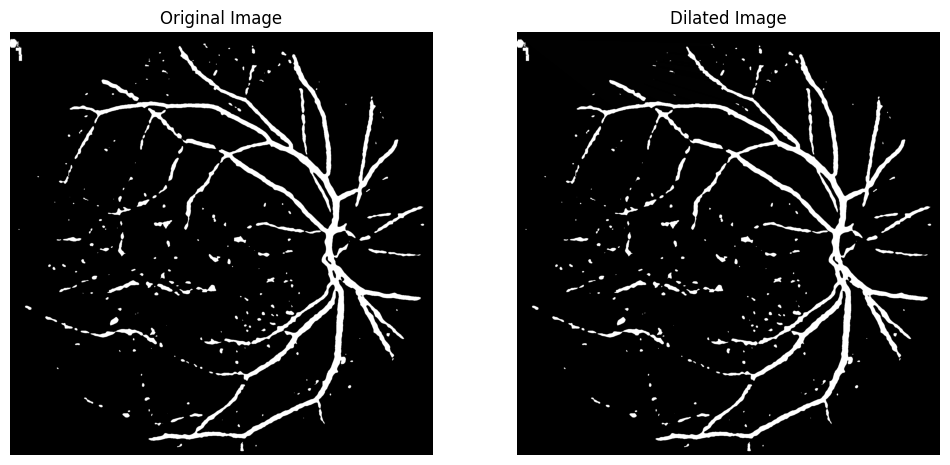

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation, sobel
from skimage.draw import line
from skimage.morphology import skeletonize
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.io import imread

binary_image = np.loadtxt('/home/pxl/myProject/血管分割/work/mask_matrix.txt', dtype=int)

# 二值化图像

# 计算梯度
gradient_x = sobel(binary_image, axis=0)
gradient_y = sobel(binary_image, axis=1)
gradient_magnitude = np.hypot(gradient_x, gradient_y)

# 找到潜在的中断点
potential_endpoints = np.argwhere(gradient_magnitude > 0.5 * gradient_magnitude.max())

# 创建一个空的掩码
mask = np.zeros_like(binary_image, dtype=bool)

item = 0
# 连接中断点
for y1, x1 in potential_endpoints:
    item = item + 1
    if item>100:
        break
    for y2, x2 in potential_endpoints:
        if (y1, x1) != (y2, x2):
            rr, cc = line(y1, x1, y2, x2)
            if np.all(binary_image[rr, cc] == 0):  # 确保路径之间没有已有的线段
                mask[rr, cc] = True

# 对路径进行膨胀
struct_element = np.ones((5, 5), dtype=bool)  # 5x5的结构元素
dilated_mask = binary_dilation(mask, structure=struct_element)

# 将膨胀后的掩码应用于原始矩阵
dilated_image = np.where(dilated_mask, 1, binary_image)

# 创建图形
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 显示原始图像
ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# 显示膨胀后的图像
ax[1].imshow(dilated_image, cmap='gray')
ax[1].set_title('Dilated Image')
ax[1].axis('off')

plt.show()

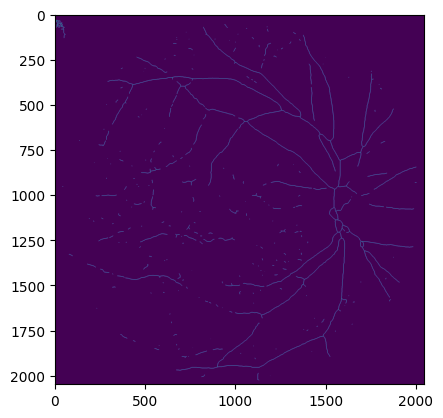

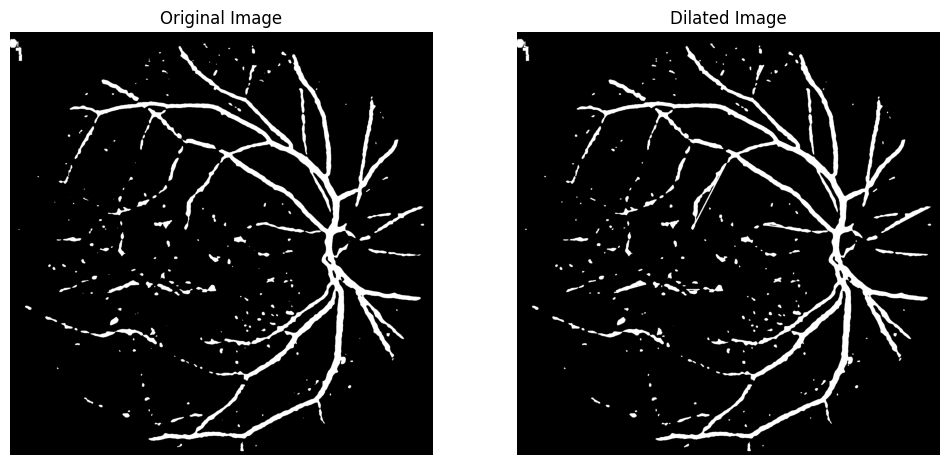

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation, sobel
from skimage.draw import line
from skimage.morphology import skeletonize
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.io import imread

# 读取图像


# 二值化图像
thresh = threshold_otsu(gray_image)
binary_image = gray_image > thresh

# 计算梯度
gradient_x = sobel(binary_image, axis=0)
gradient_y = sobel(binary_image, axis=1)
gradient_magnitude = np.hypot(gradient_x, gradient_y)

# 找到潜在的中断点
potential_endpoints = np.argwhere(gradient_magnitude > 0.5 * gradient_magnitude.max())

# 创建一个空的掩码
mask = np.zeros_like(binary_image, dtype=bool)

# 连接中断点
for y1, x1 in potential_endpoints:
    for y2, x2 in potential_endpoints:
        if (y1, x1) != (y2, x2):
            rr, cc = line(y1, x1, y2, x2)
            if np.all(binary_image[rr, cc] == 0):  # 确保路径之间没有已有的线段
                mask[rr, cc] = True

# 对路径进行膨胀
struct_element = np.ones((5, 5), dtype=bool)  # 5x5的结构元素
dilated_mask = binary_dilation(mask, structure=struct_element)

# 将膨胀后的掩码应用于原始矩阵
dilated_image = np.where(dilated_mask, 1, binary_image)

# 创建图形
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 显示原始图像
ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# 显示膨胀后的图像
ax[1].imshow(dilated_image, cmap='gray')
ax[1].set_title('Dilated Image')
ax[1].axis('off')

plt.show()

# （Optional）查看图像滤波情况

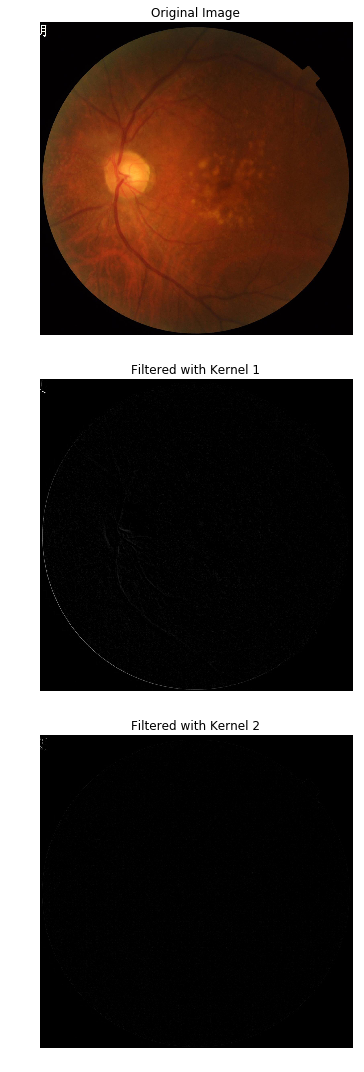

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 读取图像
image_path = '/home/pxl/myProject/血管分割/RawData/FIVES-rawData/train/Original/51_A.png'  # 确保路径正确
image = cv2.imread(image_path)

# 检查图像是否加载成功
if image is None:
    raise ValueError(f"图像未能加载成功，请检查路径是否正确: {image_path}")

# 2. 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. 定义自定义滤波核
kernel_1 = np.array([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]])
kernel_2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# 4. 使用filter2D进行卷积操作
filtered_image_1 = cv2.filter2D(gray_image, -1, kernel_1)
filtered_image_2 = cv2.filter2D(gray_image, -1, kernel_2)

# 5. 显示原始图像和滤波后的结果，使用单列布局
plt.figure(figsize=(5, 15))  # 修改窗口大小，适应一列的布局

plt.subplot(3, 1, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 1, 2)
plt.title('Filtered with Kernel 1')
plt.imshow(filtered_image_1, cmap='gray')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.title('Filtered with Kernel 2')
plt.imshow(filtered_image_2, cmap='gray')
plt.axis('off')

plt.tight_layout()  # 调整子图间的布局
plt.show()